# Tellende prosjekt i ISTx1003 - 2021

I prosjektdelen av ISTx1003 Statistikk, Statistisk læring og data science, har vi fokus på tre hovedtemaer: 
regresjon, klassifikasjon og klyngeanalyse. 

Dette er oppgaveteksten til den tellende prosjektoppgaven, der besvarelsen teller 30% av karakteren i emnet.  

Veiledning av prosjektoppgaven annonseres separat for hver campus i Blackboard.

Oppgaven utføres i grupper, med anbefalt gruppestørrelse 2-4 personer. **Det er opprettet gruppesett under "Prosjektoppgaven" på Blackboard**, der dere melder dere på. 

Informasjon om Prosjektmodulen finnes i Blackboard.  

Det er totalt xy spørsmålspunkter som skal besvares, og hvert spørsmålspunkt gir maksimalt ett poeng. Alle spørsmålene er skrevet inn i en tekstfil som skal brukes som mal for det som skal leveres inn. Tekstfilen ligger her: https://www.math.ntnu.no/emner/IST100x/ISTx1003/Prosjekt1003Qs.txt
(Det er to grunner til å bruke denne malen: det letter samskriving og det letter karaktersetting.)

Oppgaven skal utføres i Python, ved hjelp av Jupyter-notatbok-versjonen av denne filen som du nå leser. Notatboken er lastet opp på Jupyterhubben (todo), men kan også finnes her: https://wiki.math.ntnu.no/istx1003/2021h/start


Det er meningen at dere skal kjøre notatboken på Jupyterhubben vår https://s.ntnu.no/isthub, eller på deres egen installasjon.

Innlevering av prosjektet skal skje som en innlevering på Blackboard, og kun en i hver gruppe leverer.

**Følgende skal leveres inn (lastes opp på Blackboard):**

* Svarene på spørsmålene som dere har skrevet inn i spørsmålsmalen og **laget om til en pdf-fil** (for eksempel om dere har gjor om malen til en word-fil og så lagret den som pdf).
* Denne Jupyter-notatboken, der de endringene dere har gjort i koden er med.

**Frist for innlevering av prosjektet er mandag 29.november kl 23.59.** (to adjust)

# Oppgave 1: Regresjon

Vi bruker en dataeksempel om kostnader i Amerkanske sykehus mellom 1989 og 1991, hvor spørsmålet var hvilke faktorer er avgjørende for å forutse hvor mye en sykehusopphold av en pasient koster. Som dataingeniør vil du antakeligvis jobbe med mange forskjellige type medarbeider og data, som for eksempel i forskning, i finanssektoren, teknologigrupper etc. Dette er spennende.
 

**Oppgaven inneholder følgende elementer:**

* Laste inn og utforske et datasett
* Tilpasse en enkel lineær regresjonsmodell og diskutere denne
* Tilpasse en multippel lineær regresjonsmodell og diskutere denne

## Totale kostnader for pasienter inlagit i Amerikanske sykehus (1989-1991)

* `totcst`: totale kostnader 
* `age`: alder
* `dzgroup`: sykdomsgruppe (type av sykdom)
* `num.co`: antall komorbiditeter (hvor mange sykdommer noen har)
* `edu`: antall år med utdanning
* `income`: inntektet (kategorisert) 
* `scoma`: et mål for Glasgow Coma verdi (for grad av våkenhet)
* `meanbp`: gjennomsnittig blodtrykk
* `hrt`: puls
* `resp`: respirasjonsfrekvens
* `temp`: kroppstemperatur
* `race`: etnisitet
* `pafi`: forhold av PaO2/FiO2 (blod/gas blanding)

In [54]:
# importere pakker og funksjoner vi trenger i oppgave 1

# generelt - numerikk og nyttige funksjoner
import numpy as np
import pandas as pd

# plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Fordelinger, modeller for regresjon, qq-plott 
from scipy import stats
import statsmodels.formula.api as smf
import statsmodels.api as  sm

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
InteractiveShell.ast_node_interactivity = "last_expr"

## Datasettet

Vi leser inn data og skriver ut de første og siste observasjonene i datasettet, og så sjekkes datatyper og noen typer konverteres til type *category* fordi det er kategorielle variabler.

In [55]:
# Lese inn datasettet ved funksjon fra pandas  (df=data frame - vanlig navn å gi et datasett)
#df = pd.read_csv("~/Teaching/ISTT1003/2021/Prosjekt2021/data/support.csv", sep = ',')
df = pd.read_csv("https://www.math.ntnu.no/emner/IST100x/ISTx1003/support.csv", sep = ',')

# Skriv ut de første og siste radene
print(df)

        age            dzgroup  num.co   edu      income  scoma     totcst  \
0     43.54  ARF/MOSF w/Sepsis       1   NaN         NaN     26  390460.50   
1     63.66  ARF/MOSF w/Sepsis       0  22.0    $25-$50k     26  156674.13   
2     31.84          Cirrhosis       2  16.0  under $11k      0   17528.44   
3     48.70        Lung Cancer       0  16.0         NaN      0   33002.50   
4     49.61  ARF/MOSF w/Sepsis       1  12.0    $25-$50k      0  288592.25   
...     ...                ...     ...   ...         ...    ...        ...   
8137  68.62               COPD       2  12.0  under $11k      0    1847.38   
8138  66.07  ARF/MOSF w/Sepsis       1   8.0         NaN      0   34329.31   
8139  55.15               Coma       1  11.0         NaN     41   23558.50   
8140  70.38  ARF/MOSF w/Sepsis       1   NaN         NaN      0   31409.02   
8141  81.54  ARF/MOSF w/Sepsis       1   8.0    $11-$25k      0   10605.76   

       race  meanbp    hrt  resp   temp    pafi  
0     white  

In [56]:
# Konverter kjønn og idrettsgren til kategory
df=df.astype({'dzgroup':'category','race':'category','income':'category'})
print(df["dzgroup"].value_counts())
print(df["race"].value_counts())
print(df["income"].value_counts())

ARF/MOSF w/Sepsis    3076
CHF                  1290
COPD                  895
Lung Cancer           825
MOSF w/Malig          613
Coma                  528
Cirrhosis             458
Colon Cancer          457
Name: dzgroup, dtype: int64
white       6499
black       1178
hispanic     263
other         94
asian         71
Name: race, dtype: int64
under $11k    2571
$11-$25k      1360
$25-$50k       942
>$50k          605
Name: income, dtype: int64


In [57]:
df.describe()

,age,num.co,edu,scoma,totcst,meanbp,hrt,resp,temp,pafi
count,8142.000000,8142.000000,6680.000000,8142.000000,8142.000000,8142.000000,8142.000000,8142.000000,8142.000000,6042.000000
mean,63.020722,1.901498,11.756587,11.648858,30865.642767,84.775608,97.709862,23.525669,37.100981,240.604037
std,15.537342,1.352183,3.429399,24.258079,45717.962369,26.725561,30.638716,9.464641,1.244434,110.482380
min,18.120000,0.000000,0.000000,0.000000,420.310000,22.000000,0.000000,0.000000,31.700000,12.000000
25%,53.250000,1.000000,10.000000,0.000000,5958.347500,63.000000,72.000000,18.000000,36.200000,155.022500
50%,65.145000,2.000000,12.000000,0.000000,14484.290000,77.000000,100.000000,24.000000,36.700000,225.220000
75%,74.400000,3.000000,14.000000,9.000000,36146.585000,107.000000,120.000000,28.000000,38.090000,306.630000
max,101.850000,9.000000,31.000000,100.000000,633212.000000,195.000000,300.000000,90.000000,41.700000,890.380000


In [58]:
df.dtypes

age         float64
dzgroup    category
num.co        int64
edu         float64
income     category
scoma         int64
totcst      float64
race       category
meanbp        int64
hrt         float64
resp          int64
temp        float64
pafi        float64
dtype: object

Her ser vi alle kontinuerlige variabler, mens dzgroup, income og race er kategoriske, og de må vi kode om med såkalt dummy-variabelkoding for å bli behandlet riktig i regresjonsanalysen.

## Enkel lineær  regresjon 

Nå skal vi se på de totale kostnader `totcst` som responsen vi ønsker å undersøke/forklare, og vi skal starte med å bare se på 
variablen 'age' som eneste forklaringsvariabel. Følgende er et kryssplott av 'totcst' mot 'age':

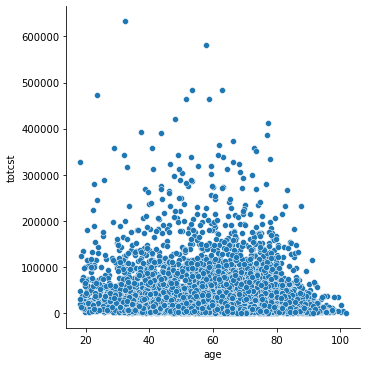

In [59]:
sns.relplot(x = 'age', y = 'totcst', kind = 'scatter', data = df)
plt.show()

### **Problem 1a)** (1P) 
Vil du konkludere med at en lineær regressjonsmodell passer bra? Hvorfor (ikke)?

I en tilfelle som her er det ofte lurt å transformere én eller flere variabler. Som statistiker vet vi at en logaritmisk transformasjon ofte hjelper. Det gjør vi nå og ser på kryssplotten igjen:

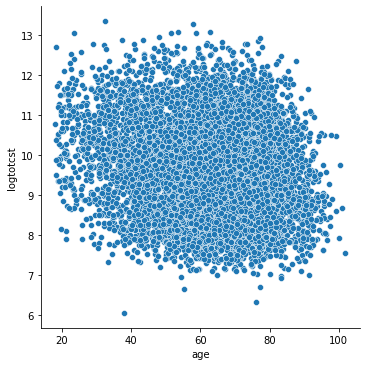

In [60]:
# Vi lager en ny variabel som er log(totcst):
df['logtotcst'] = np.log(df['totcst'])
sns.relplot(x = 'age', y = 'logtotcst', kind = 'scatter', data = df)
plt.show()

### **Problem 1b)** (1P) 
Sammenlign den nye grafen (med log(totcost) som respons) med den gamle grafen lengre opp. Har du tro på at en lineær regresjonsmodell passer nå?

Uavhengig av hva du svarte under b) skal vi nå tilpasse en enkel lineær modell med 'logtotcst' som respons og 'age' som forklaringsvariabel. For å oppsummere det vi har snakket om i undervisningen, så består det å utføre en (enkel og multippel) lineær regresjonsanalyse av følgende steg:
    
* Steg 1: Bli kjent med dataaene ved å se på oppsummeringsmål og ulike typer plott
* Steg 2: Spesifiser en matematisk modell (med modellformel)
* Steg 3: Initialiser og tilpass modellen
* Steg 4: Presenter resultater fra den tilpassede modellen 
* Steg 5: Evaluer om modellen passer til dataene

Vi har nå gjort Steg 1, og under finner du kode for å gjøre steg 2-4. Studér og kjør koden.

In [61]:
# kodechunk Steg2-4

# Steg 2: spesifiser matematisk modell
formel='logtotcst ~ age'

# Steg 3: Initaliser og tilpass en enkel lineær regresjonsmodell
# først initialisere
modell = smf.ols(formel,data=df)
# deretter tilpasse
resultat = modell.fit()

# Steg 4: Presenter resultater fra den tilpassede regresjonsmodellen
print(resultat.summary())

                            OLS Regression Results                            
Dep. Variable:              logtotcst   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                  0.032
Method:                 Least Squares   F-statistic:                     273.6
Date:                Wed, 15 Sep 2021   Prob (F-statistic):           1.83e-60
Time:                        11:20:39   Log-Likelihood:                -12832.
No. Observations:                8142   AIC:                         2.567e+04
Df Residuals:                    8140   BIC:                         2.568e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.4962      0.054    193.713      0.0

Nå skal vi studere resultatene i *resultat.summary()*, og vi refererer til *øvre panel* som linjene mellom første og andre doble strek ==== (dette er delen som starter med Dep.Variable), *midtre panel*, og *nedre panel* (som starter med Omnibus). 

### **Problem 1c)** (2P) 

   (i) Skriv ned ligningen for den estimerte regresjonsmodellen (se midtre panel).

   (ii) Hvordan vil du tolke den estimerte verdien til skjæringpunktet (Intercept) $\hat{\beta}_0$?
   
   (iii) Se på den øvre panel og rapporter $R^2_{adj}$ og gi en tolking for verdien (er den stor/liten, hva betyr det her?). 
   
   
  Vi kan nå ogås plotte den estimerte regresjonslinien i kryssplotten. 

<AxesSubplot:xlabel='age', ylabel='logtotcst'>

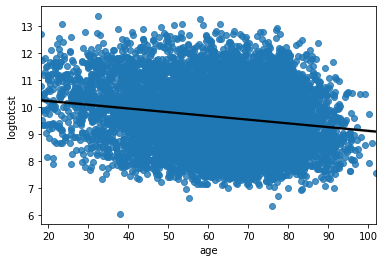

In [62]:
sns.regplot(x=df['age'],y=df['logtotcst'],line_kws={"color": "black"})

### **Problem 1d)** (3P)

 (i) Vi ser at for 'age' er 'coef' lik -0.0138 (dette er $\hat\beta_1$). Tolk dette tallet til en ansatte i sykehuset som ikke har hørt om enkel lineær regresjon.

 (ii) Hva er 95% konfidensintervallen for $\hat\beta_{1}$, og hva betyr det? Forklar det til din kollega som jobber på sykehuset.

 (iii) Hva er $p$-verdien for $\hat\beta_{1}$? Forklar om vi kan være sikkert for at alderen har en korrelasjon med 'logtotcost'. Hvorfor (ikke)? 


**Answer**:



En viktig steg når vi tilpasser en modell er å sjekke om modellen faktisk passer. Ellers kan vi ende med feil konklusjoner!

Sjekk modellantakelser

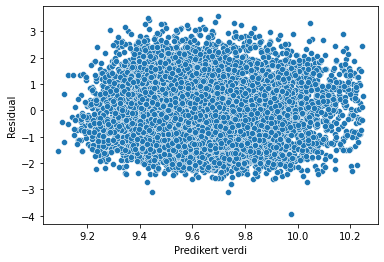

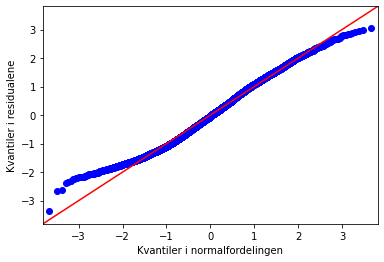

In [63]:
# kodechunk Steg5

# Steg 5: Evaluere om modellen passer til dataene
# Plotte predikert verdi mot residual 
sns.scatterplot(x=resultat.fittedvalues, y=resultat.resid)
plt.ylabel("Residual")
plt.xlabel("Predikert verdi")
plt.show()

# Lage kvantil-kvantil-plott for residualene
sm.qqplot(resultat.resid,line='45',fit=True)
plt.ylabel("Kvantiler i residualene")
plt.xlabel("Kvantiler i normalfordelingen")
plt.show()

### **Problem 1e)** (4P)

(i) (1P) Studer plottet av predikert verdi mot residual (Tukey-Anscombe (TA) plot). Vurderer du at modellantagelsene er oppfylt? Gi en kurt begrunnelse.

(ii) (1P) Studer QQ-plottet av residualene. Hvordan vil du evaluere plottet?

(iii) (2P) Generer de samme to plottene når for en regresjon hvor vi bruker 'totcst' uten log-transformasjon `formel='totcst ~ age'` (kopier python coden fra steg 1-5 og se på TA og kvantilplott). Interpretasjon?

## Multippel lineær regresjon

For å bedre forutsi de totale kostnader en pasjent kan det være lurt å ta med flere forklaringsvariabler inn i regresjonsanalysen vår.

Det er en rekke plott som nå vises. Vi ser kryssplott, tetthetsplott (som er en glattet versjon av histogram) og boksplott. For tetthetsplottene og boksplottene ser vi også at vi deler data inn i de forskjellige sykdomgruppene for å se om den type sykdom påviker effekten som alder og num.co har på kostnadene (logtotcst).

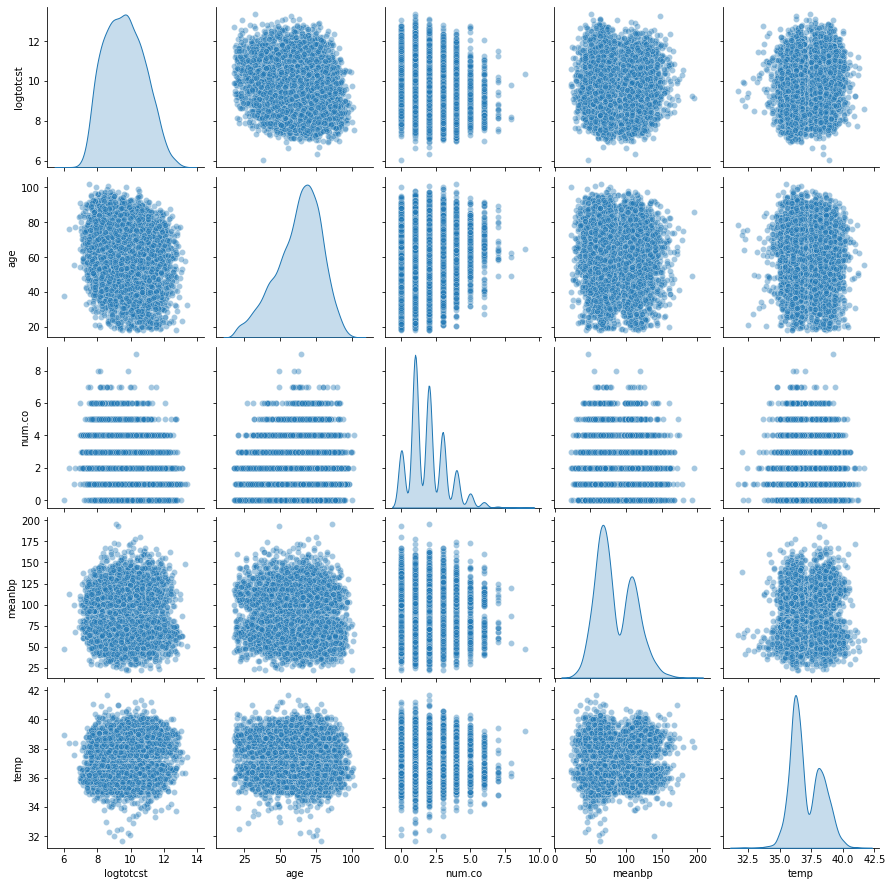

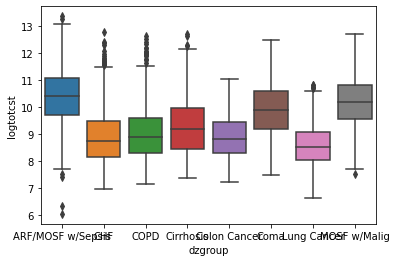

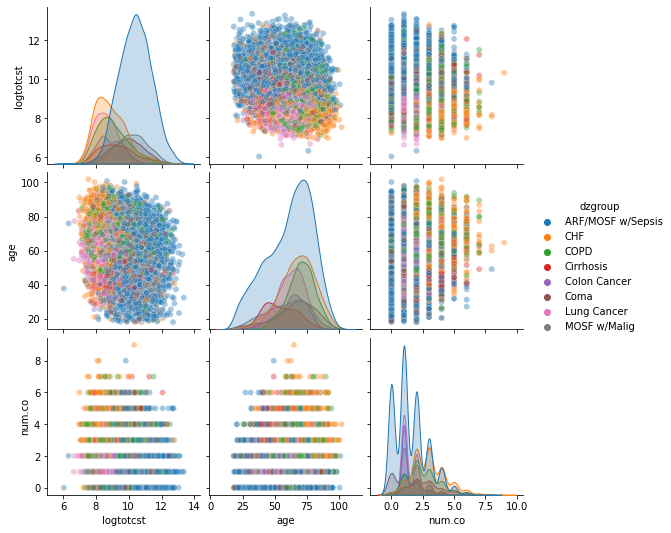

In [80]:
# Kryssplott av logtotcst mot age, num.co, meanbp og temp
# På diagonalen er glattede histogrammer (tetthetsplott) av  logtotcst, age, num.co, meanbp og temp
sns.pairplot(data=df, vars = ['logtotcst','age','num.co','meanbp','temp'],
             diag_kind = 'kde',
             plot_kws=dict(alpha=0.4))
plt.show()

# Boksplott av Blodceller for hvert Kjoenn og for hver Sport

ax = sns.boxplot(x="dzgroup", y="logtotcst", data=df)
plt.show()

sns.pairplot(df, vars = ['logtotcst','age','num.co'],
             hue = 'dzgroup', 
             diag_kind = 'kde',
             plot_kws=dict(alpha=0.4))
plt.show()

Vi skal nå tilpasse en multippel lineær regresjon med (igjen) 'logtotcst' som respons, og tar med forklaringsvariablene 'age', 'num.co', 'meanbp', 'temp' og 'dzgroup'. 

 
### **Problem 1f)** (4P)
Med den nye modellformelen (som er gitt under) utfør regresjonen på nytt (ved å kopiere inn akkurat samme kode som i "kodechunk Steg2-4" for steg 3-4 og "kodechunk Steg5" for steg 5). 

(i) Skriv ned ligningen for den estimerte regresjonsmodellen. 

(ii) Hvor mange regresjonsparametere er estimert? 

(iii) Hvis vi sammenligner en person som er inlagt med Lung Cancer med en person med COPD (en lungesykdom), som begge er like gamle, hare samme antall comorbiditeter ('num.co'), samme gjennomsnittig blodtrykk ('meanbp') og samme temperatur, hvilken pasient har de høyere forventete kostnadene?

(iv) Hva er de predikerte kostnader på den orginiale skalaen (også 'totcst', ikke 'logtotcst') for en pasient på 50 år med Colon Cancer, en comorbiditet (num.co=1), meanbp=130 og temp=36.2? Regn for hånd ved å putte inn tall fra resultat.summary().


### **Problem 1g)** (3P)

(i) Forklaringsvariablen 'dzgroup' er kategorisk og vi har brukt en såkalt dummy-variabelkoding, der 'ARF/MOSF w/Sepsis' er referansekategorien. Er effekten av de andre sykdomgruppene på 'logtotcst' forskjellig fra effekten for referansekategorien? Forklar. 

(ii) Hva er andel forklart variasjon? Sammenlign med verdien du fandt i Problem 1c(iii). Var det en god idé å bruke multippel lineær regression, eller var enkel linear regression godt nok?

(iii) Basert på utskrifter og plott. Vil du konkludere med at modelltilpasningen er god?

In [81]:
formel='logtotcst ~ age + dzgroup + num.co  +  meanbp + temp'
# kopier inn akkurat samme kode som i "kodechunk Steg2-4" for steg 3-4 
# og "kodechunk Steg5"for steg 5

# Oppgave 2: Klassifikasjon

Et populært eksempel i klassifikasjon er en implementasjon av en spam filter. Det er noe vi alle er kjent med, men har du en gang spurt deg hvordan det egentlig fungerer?

Her bruker vi en datasett med 5575 SMS meldinger som allerede har blitt klassifisert som "spam" eller "ham". Dataen er tatt fra her: 

https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection

og den originale studien finner du her: https://dl.acm.org/doi/10.1145/2034691.2034742

Du må ikke laste noe ned eller lese dette, du får alt du trenger her i oppgaveteksten.

I denne oppgaven skal vi tilpasse en logistisk regresjonsmodel som fungerer som en spam filter. 

* Email spam/ham eksempel? Check here: 
    * https://www.kdnuggets.com/2017/03/email-spam-filtering-an-implementation-with-python-and-scikit-learn.html, 
    * or here: https://towardsdatascience.com/spam-detection-with-logistic-regression-23e3709e522


In [6]:
# importere pakker og funksjoner vi trenger i oppgave 1

import pandas as pd
import numpy as np

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


from sklearn.model_selection import train_test_split, cross_val_score

# plotting
import matplotlib.pyplot as plt

## Datasettet

Vi begynner med å lese inn datasettet. Vi gir et nytt navn til kolonnene og se

Vi leser inn data og skriver ut de første og siste observasjonene i datasettet, og så sjekkes datatyper og noen typer konverteres til type *category* fordi det er kategorielle variabler.

In [8]:
# Lese inn datasettet ved funksjon fra pandas  (df=data frame - vanlig navn å gi et datasett)
df = pd.read_csv('https://www.math.ntnu.no/emner/IST100x/ISTx1003/SMSSpamCollection.txt', delimiter='\t',header=None)

# Gi nye navner til den første kolonnen (den heter nå 'y') og den andre kolonnen (som skal hete 'text')
# Så inneholder den binære responsen y = 0 for "ham" og y=1 for "spam"
# Kolonnen 'text' inneholder SMS teksten 

df = df.rename(columns={0: 'y', 1: 'text'})

df.replace(('spam', 'ham'), (1, 0), inplace=True)

print(df)

      y                                               text
0     0  Go until jurong point, crazy.. Available only ...
1     0                      Ok lar... Joking wif u oni...
2     1  Free entry in 2 a wkly comp to win FA Cup fina...
3     0  U dun say so early hor... U c already then say...
4     0  Nah I don't think he goes to usf, he lives aro...
...  ..                                                ...
5567  1  This is the 2nd time we have tried 2 contact u...
5568  0               Will ü b going to esplanade fr home?
5569  0  Pity, * was in mood for that. So...any other s...
5570  0  The guy did some bitching but I acted like i'd...
5571  0                         Rofl. Its true to its name

[5572 rows x 2 columns]


### **Problem 2a)** (2P)

 (i) Report hvor mange  av SMS meldingene er spam og hvor mange er ham. Tips: Bruk en funksjon du har sett i oppgave 1. 
 
 (ii) Plott en histogram for responsen $y$ med bruk av `plt.hist()` funksjonen.


## Logistisk regresjon


I forelesningen har vi lært at logistisk regresjon trenger forklaringsvariabler. Med to forklaringsvariabler $x_1$ og $x_2$, for eksempel, kan vi modellere sannsynligheten for en "suksess" (e.g., at en SMS melding er spam) som
$$p_i = \frac{\exp(\beta_0 + \beta_1 x_{1i} + \beta_2 x_{2i})}{ 1 + \exp(\beta_0 + \beta_1 x_{1i} + \beta_2 x_{2i})} \ .$$



### **Problem 2b)** (1P)

I dette eksempelet har vi det med en datassett med 'text' som forklaringsvariable å gjøre. Hva tenker du er problemet med dette? 


### Trening, validerings og testsett

Før vi fortsetter med modellering må vi dele datasettet i tre deler: et trening, validerings og testsett. Her bestemmer vi oss for at 70% av data er i treningssettet, og 15% er i validerings og testsettet.

In [ ]:
# Først del dataene i en trenings og testsett (70-30%)
X_train_raw, X_test_raw, y_train, y_test = train_test_split(df['text'],df['y'],test_size=0.3)

# Og så del testsettet igjen i en test og en valideringsset
X_test_raw, X_val_raw, y_test, y_val = train_test_split(X_test_raw,y_test,test_size=0.5)

### **Problem 2c)** (1P)

## 2c) Evaluere beste modeller

## 2d) $k$-nærmeste-nabo-klassifikasjon


# Oppgave 3: Klyngeanalyse

 

## Hvorfor klyngeanalyse på ...?

 

## 3a) Lese inn og preprosessere bildet

## 3c) Klyngeanalyse med $K$-gjennomsnitt

## 3d) Hierarkisk klyngeanalyse